#  DIFFUSE OPTICAL MICROSCOPY PROJECT

## Phase 1: Time domain  DOT

### Objectives:
 - Obtain Formula for absorption
 - Study Contrast function
 
### Formula on Contrast :

1. write fluence  $\phi_0(\mu_a,\mu_s',t)$ for an homogeneous medium:

$$ \phi_0(\mu_a,\mu_s',t)= \frac{c}{(4\pi cD t)^{3/2}}\cdot exp(-c\mu_a t)$$


2. write fluence perturbation $\delta \phi_0(\mu_a,\mu_s',t, \delta \mu_a,V,\vec{r})$ :

$$\delta \phi_0(\mu_a,\mu_s',t, \delta \mu_a,V,\vec{r}) = -\frac{c^2}{(4\pi D c)^{5/2} t^{3/2}} \cdot exp(-\mu_a c t) \int_{V_i} \delta \mu_a (\vec {r_p}) \left(\frac{1}{\rho_{12}} + \frac{1}{\rho_{23}}\right) exp\left\{-\frac{\left(\rho_{12} +\rho_{23}\right)^2}{4cDt}\right\} d^3 \vec{r_p}$$


3. write $C(t) \equiv  \delta \phi_0\big/ \phi_0 $ : $$ C(t) = - \frac{1}{4 \pi D} \cdot \delta \mu_a V \left(\frac{1}{\rho_{12}} + \frac{1}{\rho_{23}}\right) \cdot exp\left\{-\frac{\left(\rho_{12} +\rho_{23}\right)^2}{4cDt}\right\} $$


### Plots

In [1]:
#%matplotlib widget
#%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import ticker
from matplotlib import cm
import numpy as np



In [2]:
dim=75

## Problem data

n=1 #refraction index
c= 30/n # cm/ns
mus= 10 #cm^-1
mua=0.1 # cm^-1
Dmua=0.1 #cm^-1
D=1/(3*mus) #cm

t=np.linspace(0,10,10000)[1:] # ns

V=1 #cm^3 perturbation dimension

RP= (V*3/4)**(1/3) #cm perturbation radius


rs=np.array([0,0,0])
rd= np.array([0,0,0])
rp=np.array([0, 0 ,2])

r= np.linalg.norm(rd)
Phi0= 1e13*(c*((4*np.pi*c*D*t)**(-3/2)))*np.exp(-c*mua*t)

def perturbation(t,rs,rd,rp, perturbation="point-like",spacedomain=False,contrast=False):
    
    r= np.linalg.norm(rd)
    xs,ys,zs= rs
    xd,yd,zd= rd
    xp,yp,zp = rp
    
    
    

    
    
    
    # fig = plt.figure()
    # ax = fig.gca(projection='3d')
    # ax.voxels(X, Y, Z, mask,edgecolor='k')
    
    # plt.show()
    
    
    if perturbation== "normal":
        
        X,Y,Z= np.mgrid[-6:6:dim*1j,-6:6:dim*1j,-6:6:dim*1j]
        h=X[1,0,0]-X[0,0,0]
        
#         ax = fig.gca(projection='3d')
#         ax.voxels(X, Y, Z, dmua,edgecolor='k')

#         plt.show()
        
        
        def midpoints(x):
            sl = ()
            for i in range(x.ndim):
                x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
                sl += np.index_exp[:]
            return x

        xm,ym,zm= midpoints(X), midpoints(Y),midpoints(Z)

        mask = (xm-xp)**2+(ym-yp)**2+(zm-zp)**2 <RP**2
        dmua=np.zeros(mask.shape)
        dmua[mask]=Dmua #cm^-1
        
        
        def sumInt(tt):
            rho12= np.sqrt((xm-xs)**2+(ym-ys)**2+(zm-zs)**2)
            rho23= np.sqrt((xm-xd)**2+(ym-yd)**2+(zm-zd)**2)
            return [(h**3)*np.sum(dmua*(1/rho12 + 1/rho23) * np.exp(-(rho12 +rho23)**2 /(4*c*D*t))) for t in tt]
        
        delPhi0= -1e13*(c**2/(4*np.pi*c*D)**(5/2))*(t**-3/2)*np.exp(-c*mua*t) * sumInt(t)
        return delPhi0 , dmua
        
    if perturbation == "point-like":

        def sumInt(tt):
            rho12 = np.linalg.norm(rp-rs)
            rho23 = np.linalg.norm(rp-rd)
            if spacedomain:
                return (V)*Dmua*(1/rho12 + 1/rho23)* np.exp(- (rho12 +rho23)**2 /(4*c*D*t))
            else:
                return [(V)*Dmua*(1/rho12 + 1/rho23)* np.exp(- (rho12 +rho23)**2 /(4*c*D*t)) for t in tt]
        if contrast:
            contrast= -1/(4*np.pi*D) * np.array(sumInt(t))
            return contrast
        else:    
            delPhi0= -1e13*(c**2/(4*np.pi*c*D)**(5/2))*(t**-3/2)*np.exp(-c*mua*t) * np.array(sumInt(t))
            return delPhi0






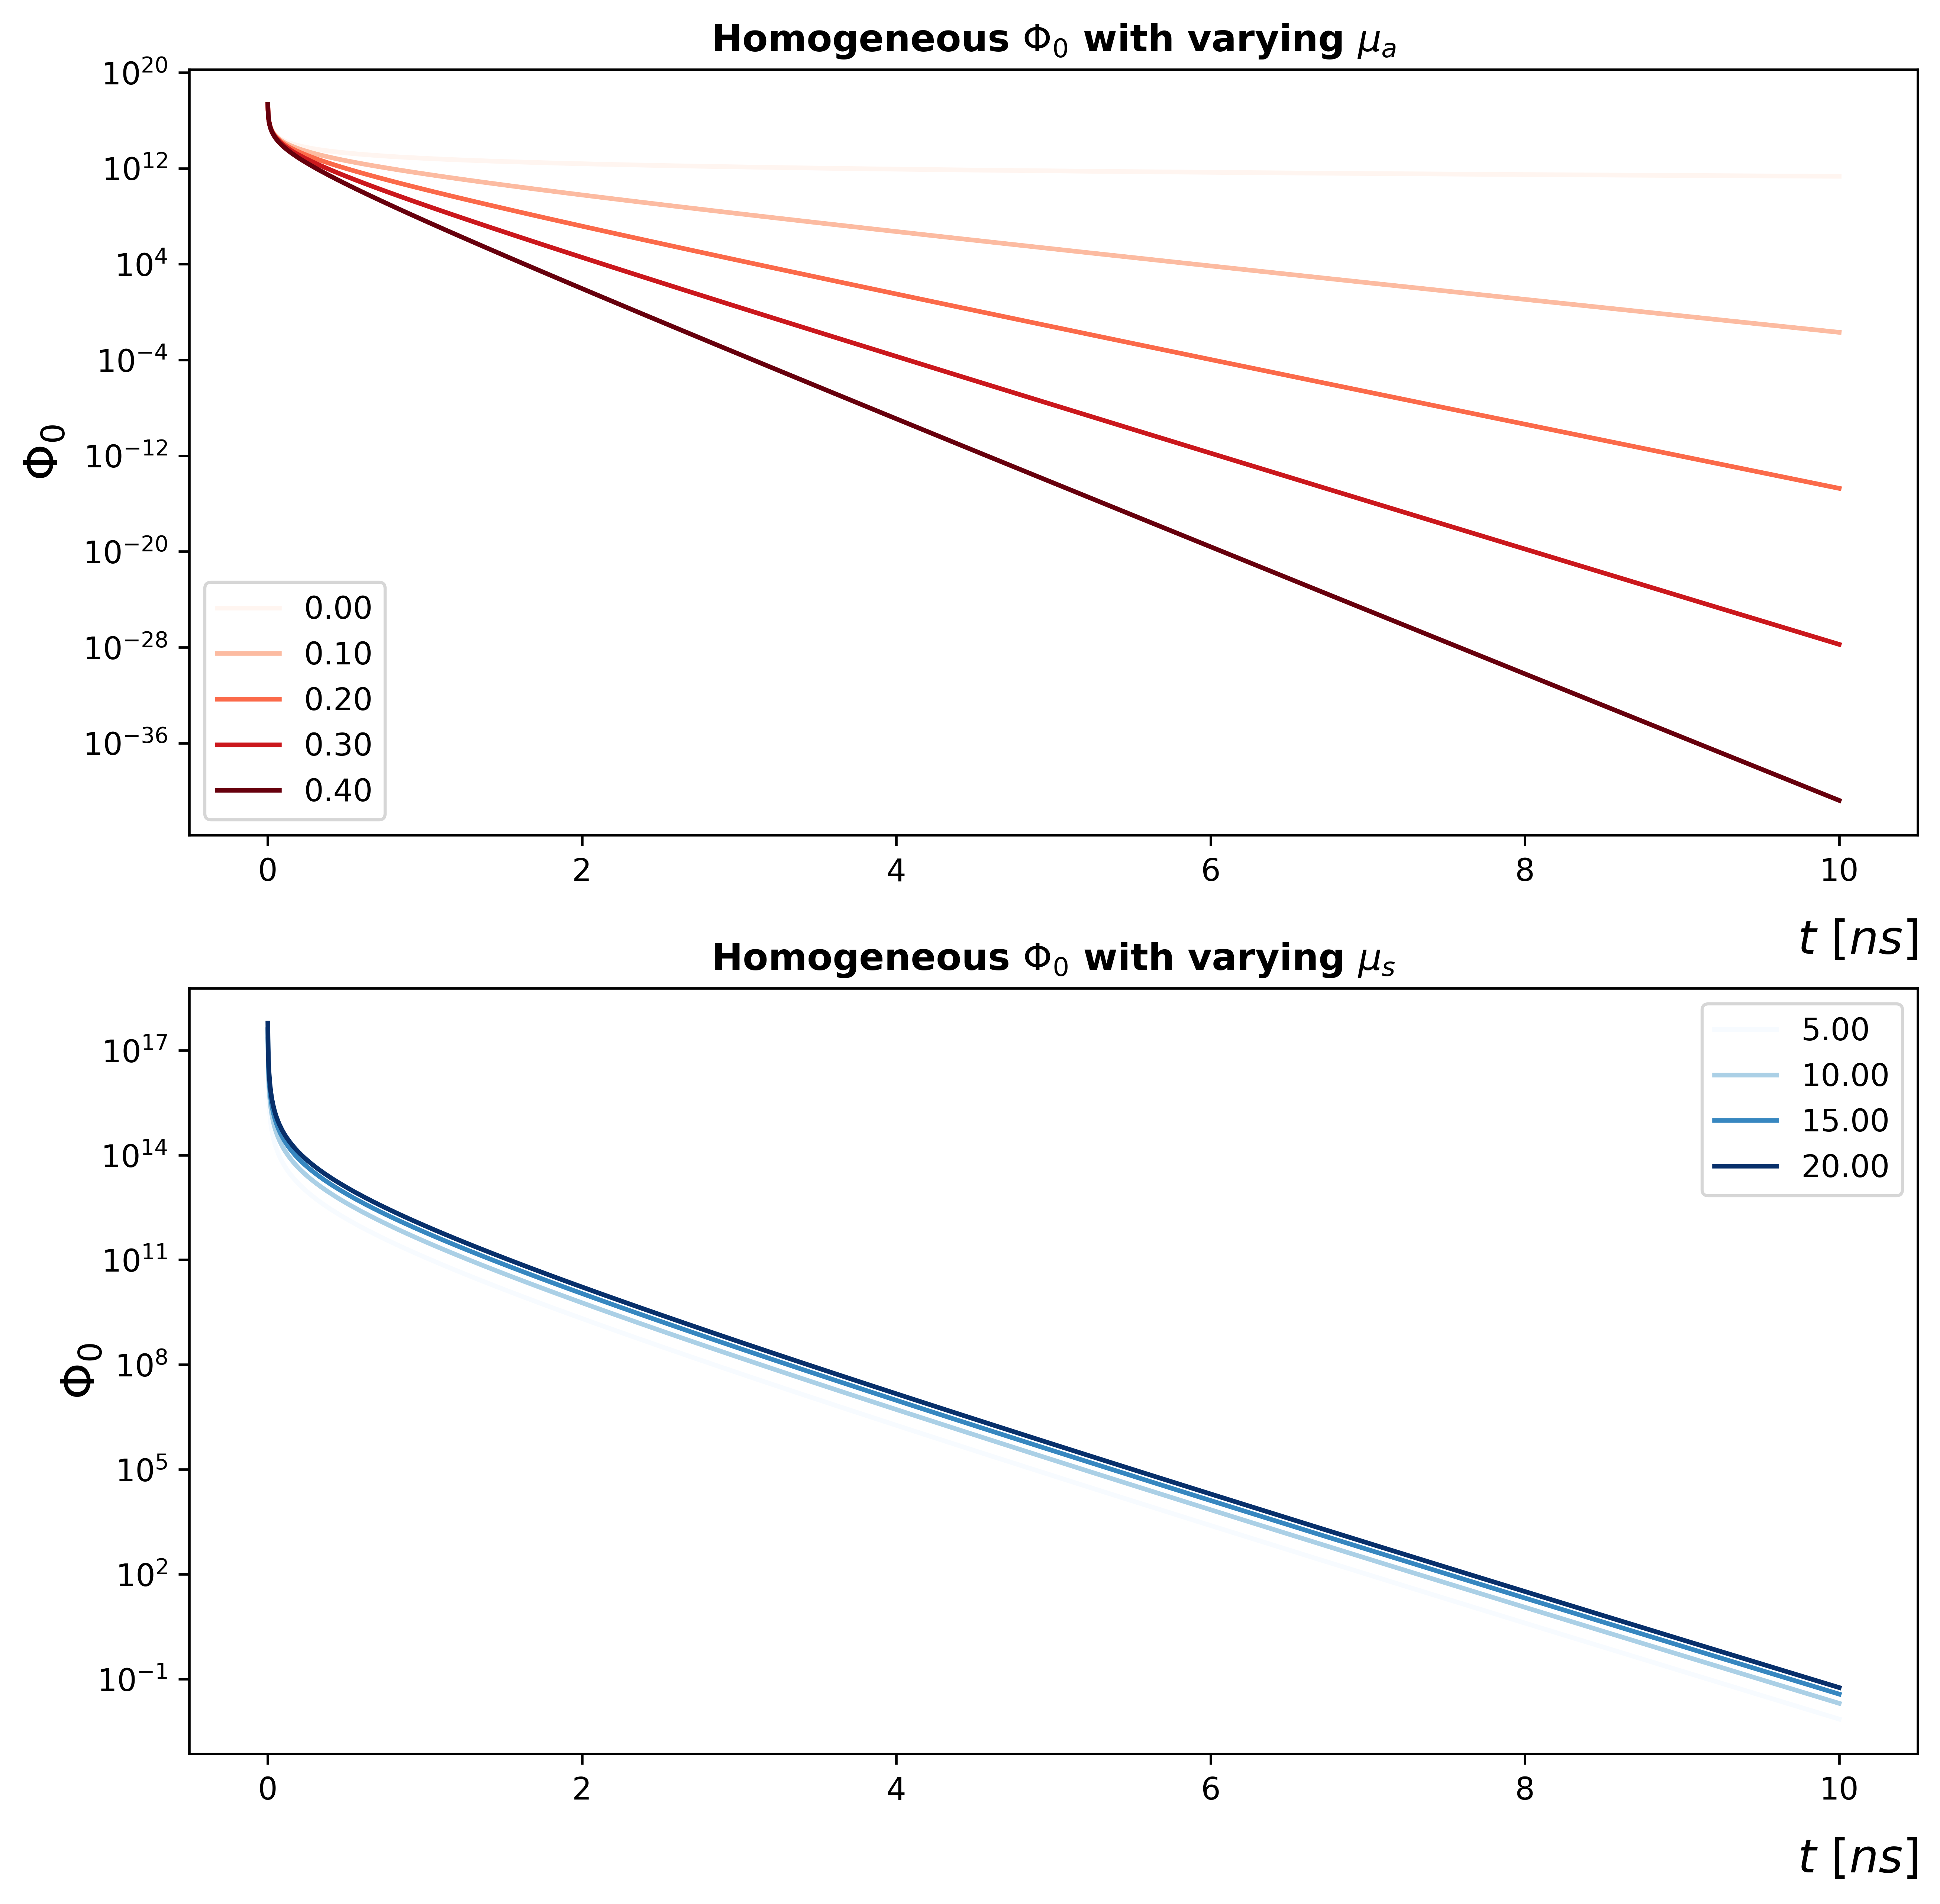

In [3]:
# Plot 1 Fluence
plt.close()
plt.rcParams['figure.dpi'] = 600
plt.rcParams["figure.figsize"] = [10,10]
fig,axs= plt.subplots(2,1,sharey=False)

axs[0].set_yscale('log')
axs[1].set_yscale('log')


muas=np.linspace(0,0.4,5)

for iteration,mua in enumerate(muas):
    #fixing mus
    mus=10
    D=1/(3*mus)
    
    colors = plt.cm.get_cmap('Reds', len(muas))
    Phi0=1e13* (c*((4*np.pi*c*D*t)**(-3/2)))*np.exp(-c*mua*t)
    axs[0].plot(t,Phi0,color=colors(iteration),label=format(mua, '.2f'))
    axs[0].set_title("Homogeneous $\Phi_0$ with varying $\mu_a$",fontweight="bold")
    axs[0].set_ylabel("$\Phi_0$",fontsize=15, labelpad=5,loc="center")
    axs[0].set_xlabel("$t\ [ns] $",fontsize=15, labelpad=10,loc="right")
    axs[0].legend()


muss= np.arange(5,20.1,5)

for iteration,mus in enumerate(muss):
    #fixing mua
    mua= 0.1
    
    D=1/(3*mus)
    colors = plt.cm.get_cmap('Blues', len(muss))
    Phi0=1e13*(c*((4*np.pi*c*D*t)**(-3/2)))*np.exp(-c*mua*t)
    axs[1].plot(t,Phi0,color=colors(iteration),label=format(mus, '.2f'))
    axs[1].set_title("Homogeneous $\Phi_0$ with varying $\mu_s$",fontweight="bold")
    axs[1].set_ylabel("$\Phi_0$",fontsize=15, labelpad=5,verticalalignment="center")
    axs[1].set_xlabel("$t\ [ns] $",fontsize=15, labelpad=10,loc="right")
    axs[1].yaxis.set_tick_params(which='both', labelbottom=True)

    axs[1].legend()


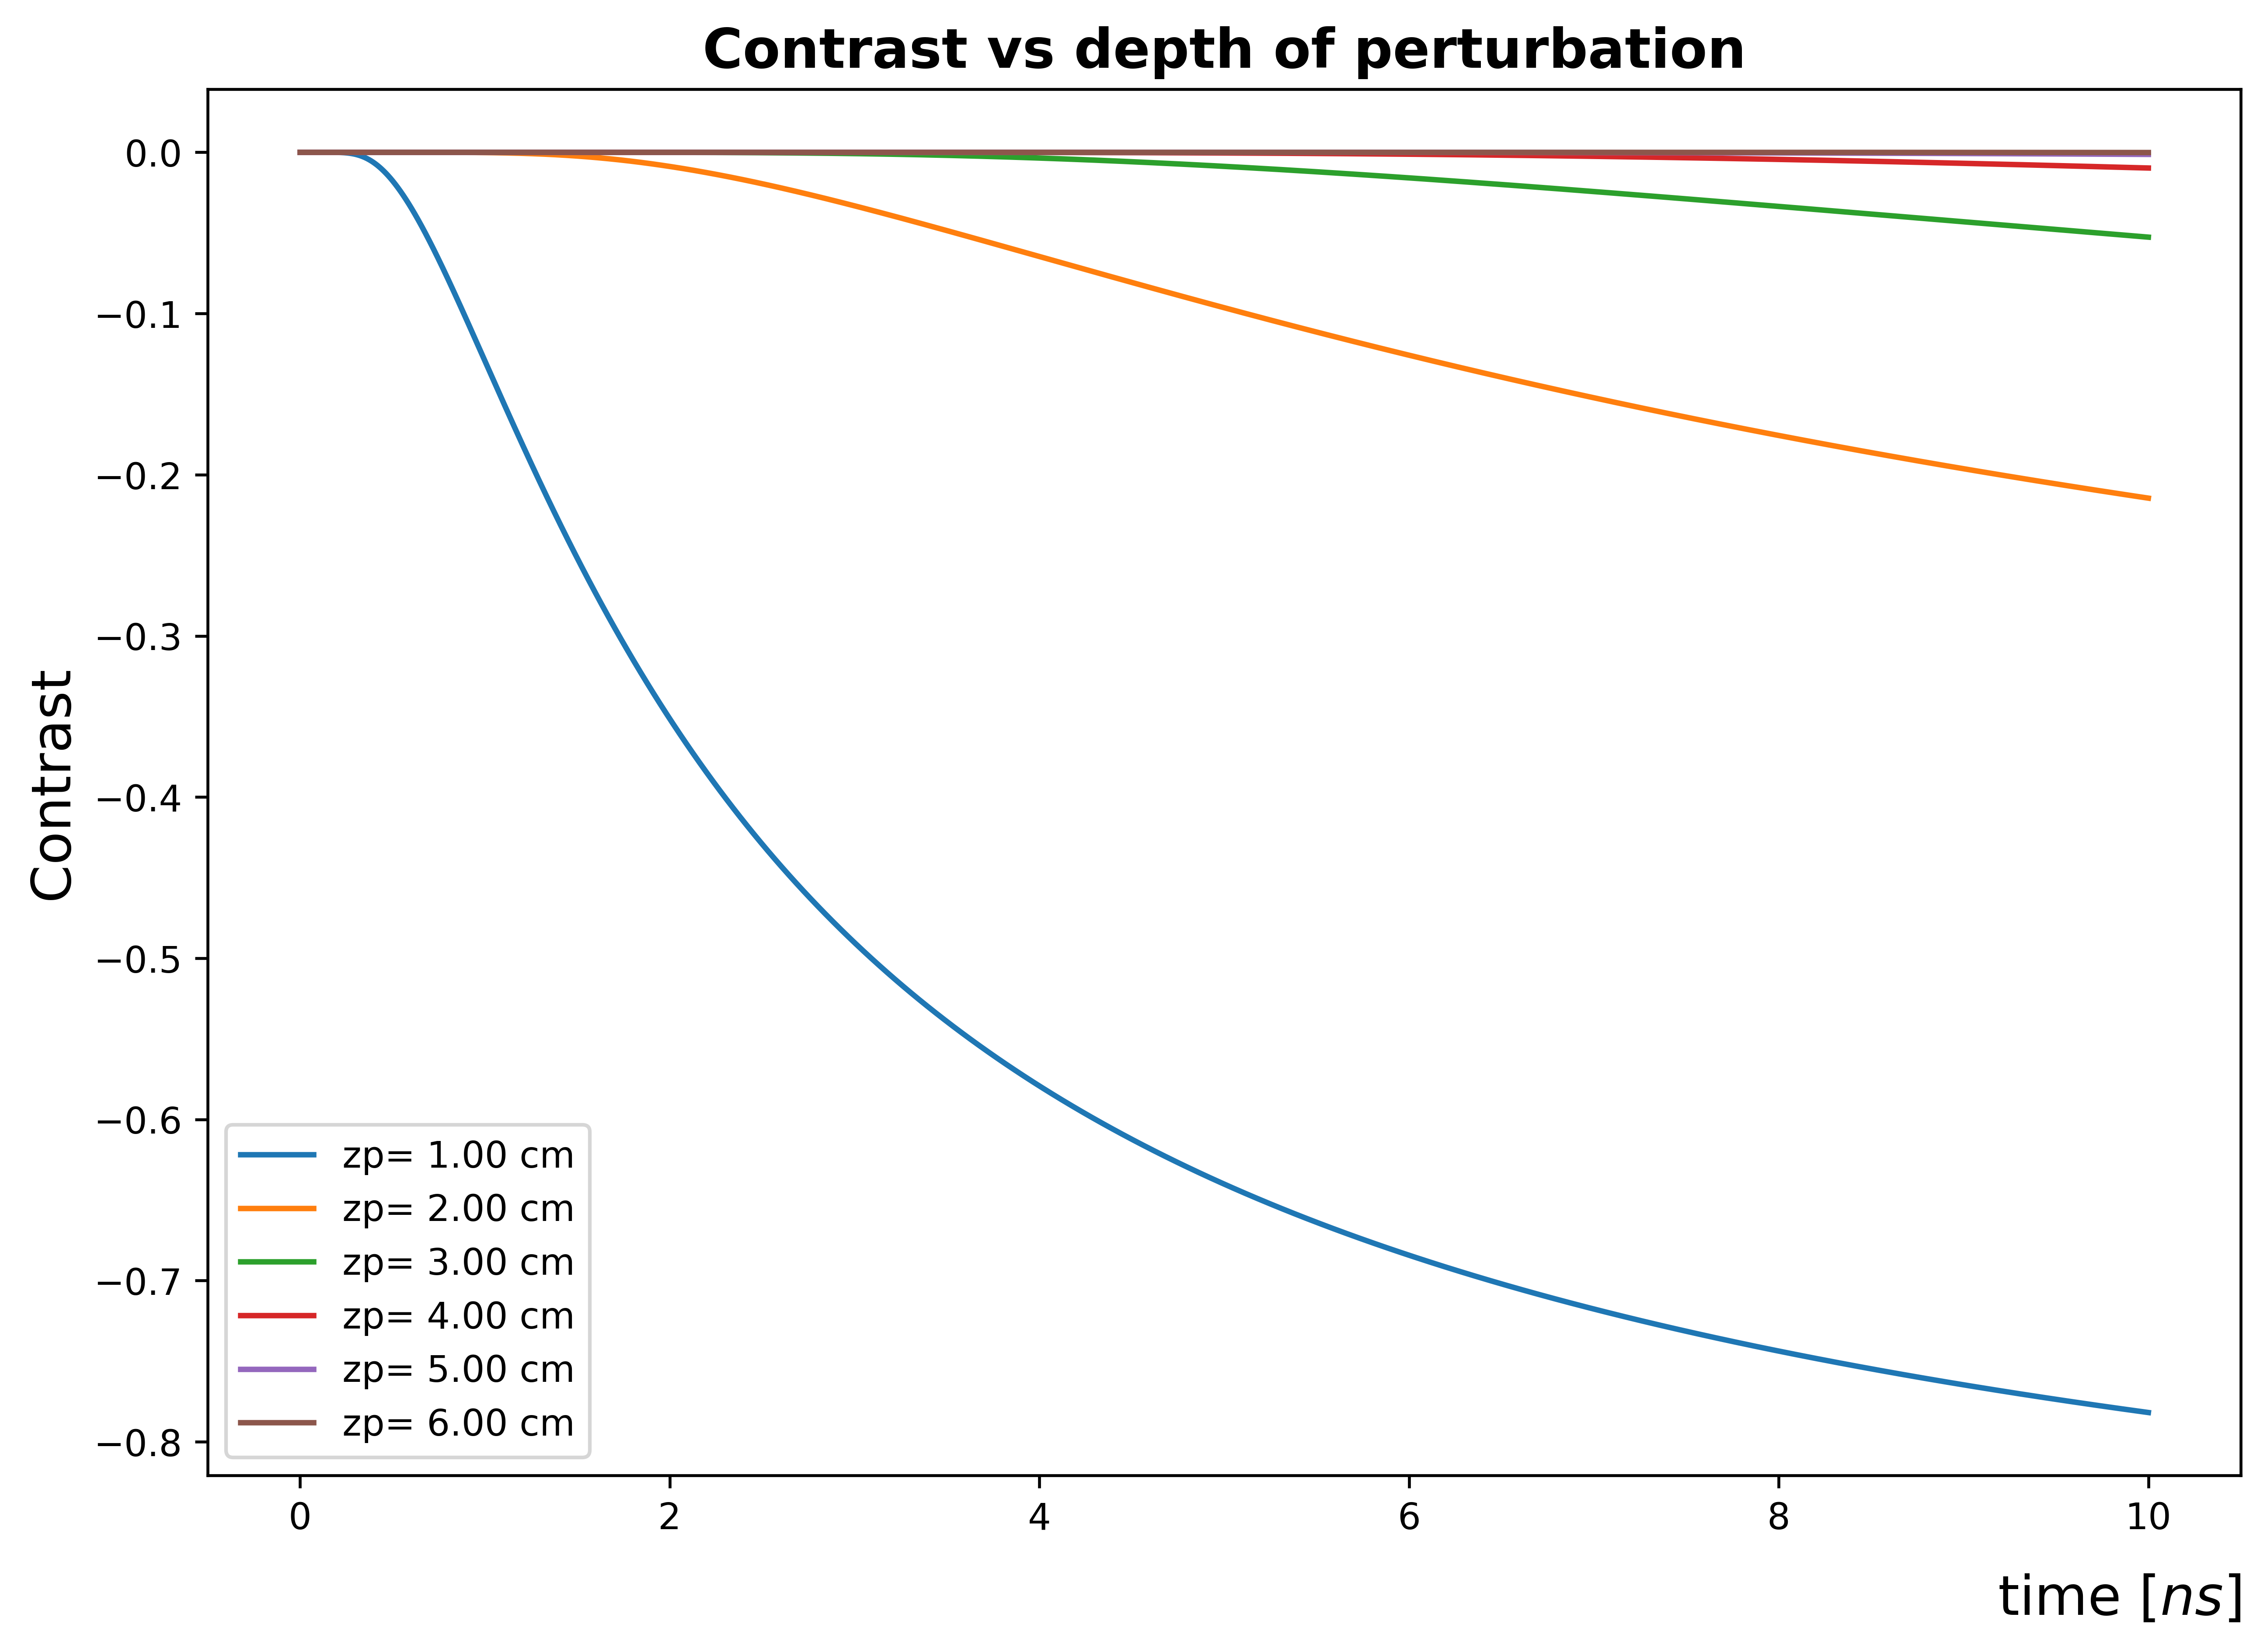

In [4]:
zp=np.arange(1,6.1)
plt.rcParams["figure.figsize"] = [10,7]
fig2= plt.figure()

for iteration,zp in enumerate(zp):
    rs=np.array([0,0,0])
    rd= np.array([0,0,0])
    rp=np.array([0, 0 ,zp])
    
    Contrast= perturbation(t,rs,rd,rp,contrast=True,spacedomain=True)   
    ##Contrast= delPhi0/Phi0
    plt.plot(t,Contrast,label="zp= "+format(zp, '.2f')+" cm")
    plt.title("Contrast vs depth of perturbation",fontsize=15, fontweight="bold")
    plt.ylabel("Contrast", fontsize=15)
    plt.xlabel("time$\ [ns] $",fontsize=15, labelpad=10,loc="right")
    plt.legend()


#fig2.show()

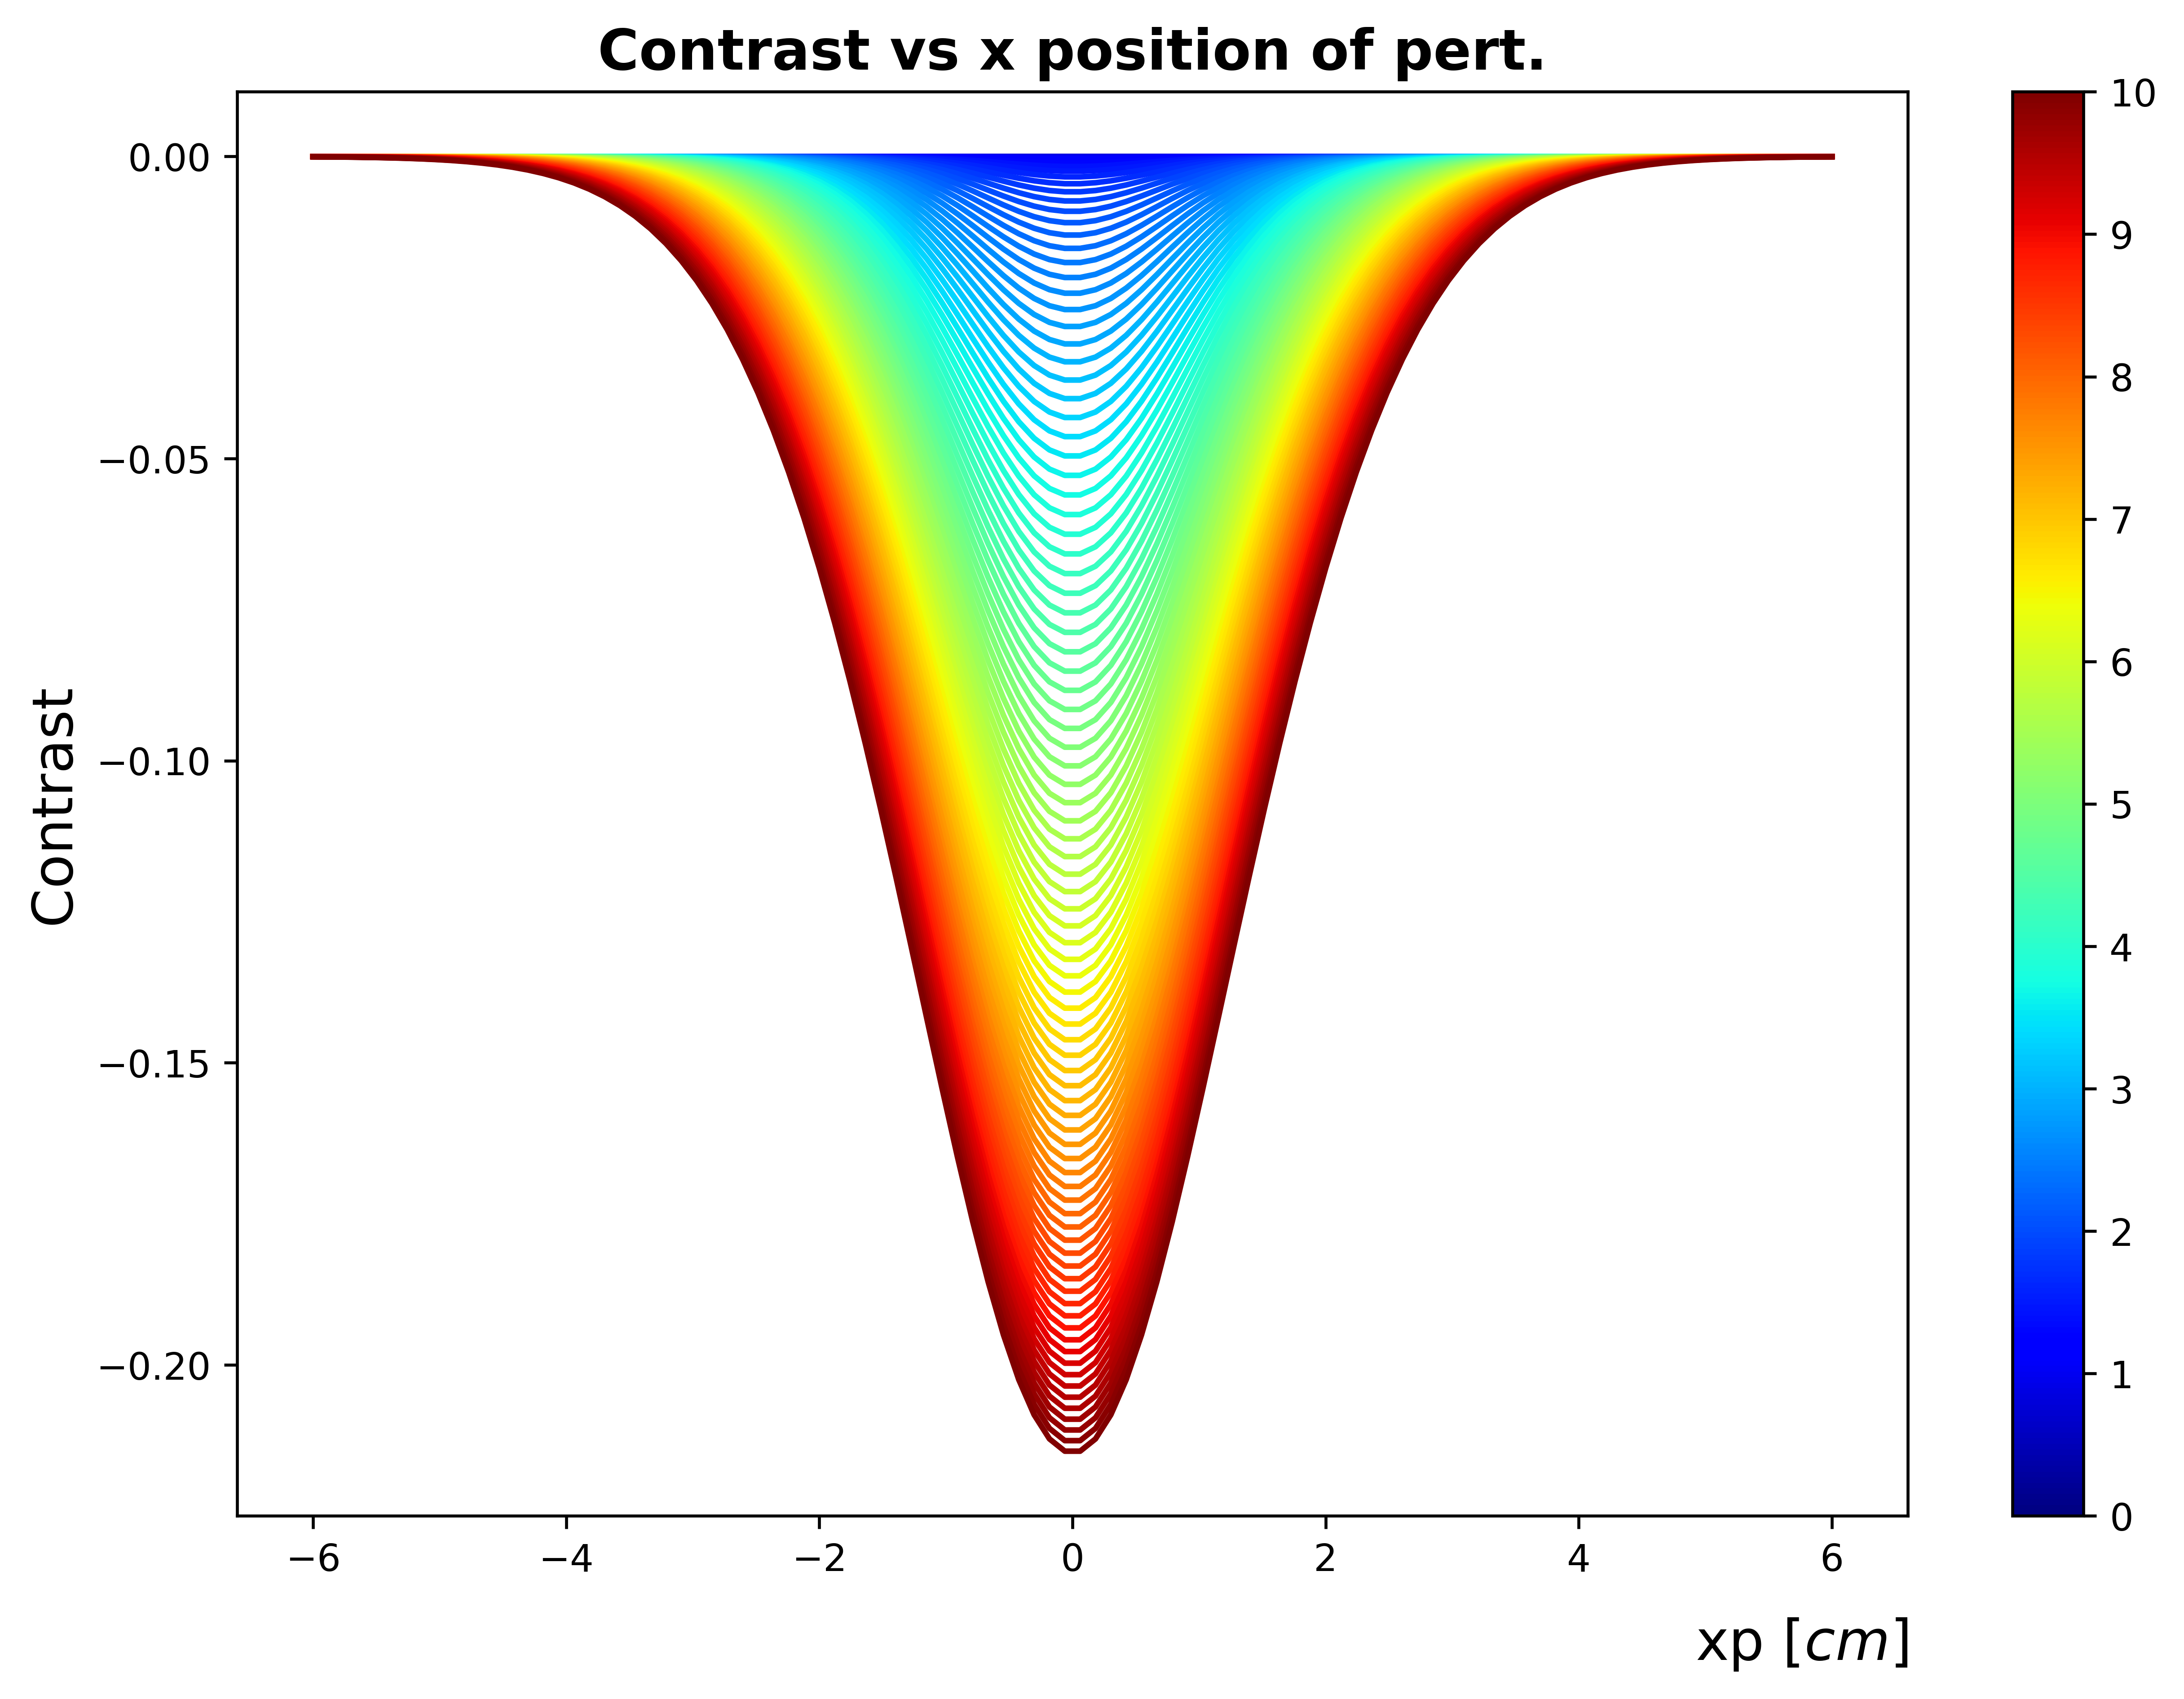

In [5]:
tt=np.linspace(0,10,100)
xp= np.linspace(-6,6,100)
fig2= plt.figure()
normalize = mcolors.Normalize(vmin=tt.min(), vmax=tt.max())

colormap =cm.jet


for iteration,t in enumerate(tt[1:]):
    Contrast=[]
    Phi0= 1e13*(c*((4*np.pi*c*D*t)**(-3/2)))*np.exp(-c*mua*t)
    for x in xp:
    
        rs=np.array([0,0,0])
        rd= np.array([0,0,0])
        rp=np.array([x, 0 ,2])

        cc= perturbation(t,rs,rd,rp,spacedomain=True,contrast=True)   
        Contrast.append(cc)
    plt.plot(xp,Contrast,color=colormap(normalize(t)))
    plt.title("Contrast vs x position of pert.",fontsize=15, fontweight="bold")
    plt.ylabel("Contrast", fontsize=15)
    plt.xlabel("xp$\ [cm] $",fontsize=15, labelpad=10,loc="right")

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(tt)
cb=plt.colorbar(scalarmappaple)
tick_locator = ticker.MaxNLocator(nbins=10)
cb.locator = tick_locator
cb.update_ticks()

    